In [ ]:
!pip install pandas openpyxl

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import re

def extract_hashtags(text):
    """Extract hashtags from text."""
    return re.findall(r"#(\w+)", text)


# Set the path to the Excel file on Google Drive
file_path = 'TWEETS.xlsx'  # Adjust the path as necessary

df = pd.read_excel(file_path)

# Extract hashtags and add them as a new column
df['Hashtags'] = df['Tweet'].apply(extract_hashtags)

# Set the start date 240 days back and define the period
start_date = datetime.now() - timedelta(days=240)
end_date = datetime.now()

# Generate random dates within the period using Poisson distribution
lambda_poisson = len(df) / 240  # Average rate (lambda) - total tweets divided by the number of days
days = np.random.poisson(lambda_poisson, len(df))  # Generate random inter-arrival times
days = np.cumsum(days)  # Convert to actual days by cumulative sum to simulate the timeline

# Ensure that days do not exceed the end_date by looping over them
dates = [min(start_date + timedelta(days=int(day)), end_date) for day in days]

# Shuffle the dates to randomize the order
np.random.shuffle(dates)

# Assign these dates to the dataframe
df['Timestamp'] = dates

# Define the path to save the updated Excel file on Google Drive
output_file_path = '/content/drive/MyDrive/updated_tweets.xlsx'  # Adjust the path as necessary

df.to_excel(output_file_path, index=False)

print(f"Updated Excel file with hashtags and timestamps saved to {output_file_path}")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Updated Excel file with hashtags and timestamps saved to /content/drive/MyDrive/updated_tweets.xlsx


In [ ]:
file_path = '/content/drive/MyDrive/updated_tweets.xlsx'  # Update the path if needed
df = pd.read_excel(file_path)

# Display the first few rows of the dataframe
print(df.head())

         Username                                              Tweet  \
0  @CyberSleuth99  Just heard about the massive #databreach at Gl...   
1     @SecureGuru  Another day, another #ransomware attack. This ...   
2  @PhishingAlert  Warning! Phishing emails disguised as OnlineRe...   
3  @NetDefenderHQ  Major DDoS attack reported against VideoStream...   
4  @ThreatHunterX  Malware found in OpenOffice. Users, patch ASAP...   

                                     Hashtags               Timestamp  
0  ['databreach', 'cybersecurity', 'infosec'] 2024-08-14 19:33:22.170  
1                              ['ransomware'] 2024-08-14 19:33:22.170  
2                              ['cyberaware'] 2024-08-14 19:33:22.170  
3                     ['DDoS', 'cyberattack'] 2024-08-14 19:33:22.170  
4                ['malware', 'cybersecurity'] 2024-06-05 19:33:22.170  


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


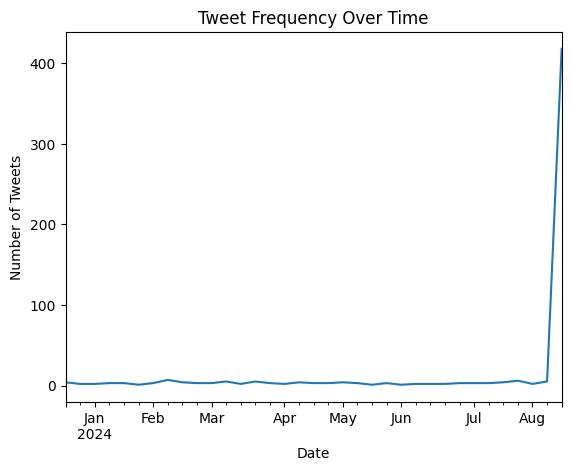

In [ ]:
import matplotlib.pyplot as plt

# Convert 'Timestamp' to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Create a time series plot of tweets over time
df.set_index('Timestamp').resample('W').size().plot(title='Tweet Frequency Over Time', ylabel='Number of Tweets', xlabel='Date')
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


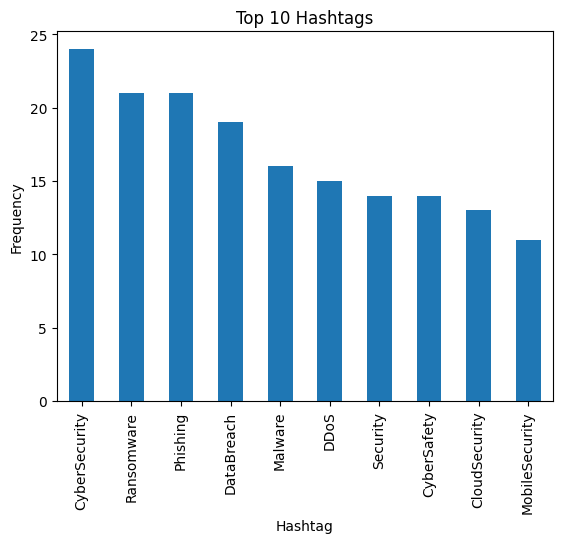

In [ ]:
from itertools import chain

# Create a list of all hashtags
all_hashtags = list(chain.from_iterable(df['Hashtags'].dropna().apply(eval)))

# Count frequencies of each hashtag
hashtag_counts = pd.Series(all_hashtags).value_counts()

# Plot the top 10 hashtags
hashtag_counts.head(10).plot(kind='bar', title='Top 10 Hashtags', ylabel='Frequency', xlabel='Hashtag')
plt.show()


In [ ]:
import pandas as pd
import re
import gensim
from gensim import corpora
from gensim.models import LdaModel
from gensim.corpora import Dictionary
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download NLTK resources if not already available
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

# Load the tweets data
file_path = '/content/drive/MyDrive/updated_tweets.xlsx'
df = pd.read_excel(file_path)

# Text preprocessing functions
def preprocess_text(text):
    """Preprocess text by removing punctuation, lowering case, removing stopwords, and lemmatizing."""
    text = re.sub(r'\s+', ' ', text)  # Replace multiple spaces with a single space
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = text.lower()  # Convert to lower case
    tokens = text.split()  # Tokenize
    tokens = [word for word in tokens if word not in stop_words]  # Remove stop words
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatize
    return tokens

# Initialize stop words and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Apply preprocessing
df['Processed_Tweet'] = df['Tweet'].apply(preprocess_text)

# Prepare data for Gensim
texts = df['Processed_Tweet'].tolist()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
# Create a dictionary from the processed tweets
dictionary = Dictionary(texts)

# Create a corpus: a list of bag-of-words representations of the tweets
corpus = [dictionary.doc2bow(text) for text in texts]

print(f"Dictionary size: {len(dictionary)}")
print(f"Corpus length: {len(corpus)}")


Dictionary size: 1340
Corpus length: 524


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Define number of topics
num_topics = 5  # Adjust based on your needs

# Train the LDA model
lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15)

# Extract topics and their labels
topics = lda_model.show_topics(num_topics=num_topics, formatted=False)
topic_labels = {}
for topic_id, topic_words in topics:
    topic_labels[topic_id] = ' '.join([word for word, _ in topic_words])

# Function to get the most relevant topic for a document
def get_dominant_topic(doc_bow):
    """Get the dominant topic for a given document."""
    topic_dist = lda_model.get_document_topics(doc_bow)
    if topic_dist:
        # Sort by topic probability and get the topic with highest probability
        dominant_topic = max(topic_dist, key=lambda x: x[1])
        topic_id = dominant_topic[0]
        return topic_labels.get(topic_id, 'Unknown')
    return 'Unknown'

# Assign topics to each tweet
df['Dominant_Topic'] = df['Processed_Tweet'].apply(lambda x: get_dominant_topic(dictionary.doc2bow(x)))

# List of countries to randomly assign
countries = ["United States", "Canada", "Brazil", "United Kingdom", "France", "Germany", "Italy", "Spain", "Portugal", "Sweden",
             "Norway", "Russia", "China", "Japan", "South Korea", "Australia", "New Zealand", "India", "Pakistan", "Bangladesh",
             "Indonesia", "Philippines", "Vietnam", "South Africa", "Nigeria", "Egypt", "Turkey", "Iran", "Mexico", "Chile",
             "Argentina", "Colombia", "Peru", "Venezuela", "Saudi Arabia"]

# Assign random countries to each tweet
df['Country'] = [random.choice(countries) for _ in df.index]

# Save the updated DataFrame to a CSV file
output_csv_path = '/content/drive/MyDrive/tweet_topic_labels.csv'
df.to_csv(output_csv_path, index=False)

print(f"Updated CSV file with topics and random countries saved to {output_csv_path}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Updated CSV file with topics and random countries saved to /content/drive/MyDrive/tweet_topic_labels.csv


In [ ]:
!pip install pyLDAvis


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 27.2 MB/s eta 0:00:00


In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models

# Prepare the visualization
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)

# Display the visualization
pyLDAvis.display(vis)

# Save the visualization to an HTML file
pyLDAvis.save_html(vis, '/content/drive/MyDrive/lda_visualization.html')

print("Topic modeling visualization saved to /content/drive/MyDrive/lda_visualization.html")


Topic modeling visualization saved to /content/drive/MyDrive/lda_visualization.html


In [ ]:
import pandas as pd
import re
import gensim
from gensim import corpora
from gensim.models import LdaModel
from gensim.corpora import Dictionary
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk

# Download NLTK resources if not already available
nltk.download('stopwords')
nltk.download('wordnet')

# Load the tweets data
file_path = '/content/drive/MyDrive/updated_tweets.xlsx'
df = pd.read_excel(file_path)

# Initialize stop words and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Text preprocessing function
def preprocess_text(text):
    """Preprocess text by removing punctuation, lowering case, removing stopwords, and lemmatizing."""
    text = re.sub(r'\s+', ' ', text)  # Replace multiple spaces with a single space
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = text.lower()  # Convert to lower case
    tokens = text.split()  # Tokenize
    tokens = [word for word in tokens if word not in stop_words]  # Remove stop words
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatize
    return tokens

# Apply preprocessing
df['Processed_Tweet'] = df['Tweet'].apply(preprocess_text)

# Prepare data for Gensim
texts = df['Processed_Tweet'].tolist()

# Create a dictionary and corpus
dictionary = Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

# Define number of topics
num_topics = 5  # Adjust based on your needs

# Train the LDA model
lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15)

# Extract topics and their labels
topics = lda_model.show_topics(num_topics=num_topics, formatted=False)
topic_labels = {}
for topic_id, topic_words in topics:
    topic_labels[topic_id] = ' '.join([word for word, _ in topic_words])

# Function to get the most relevant topic for a document
def get_dominant_topic(doc_bow):
    """Get the dominant topic for a given document."""
    topic_dist = lda_model.get_document_topics(doc_bow)
    if topic_dist:
        # Sort by topic probability and get the topic with highest probability
        dominant_topic = max(topic_dist, key=lambda x: x[1])
        topic_id = dominant_topic[0]
        return topic_labels.get(topic_id, 'Unknown')
    return 'Unknown'

# Assign topics to each tweet
df['Dominant_Topic'] = df['Processed_Tweet'].apply(lambda x: get_dominant_topic(dictionary.doc2bow(x)))

# Save the updated DataFrame to a CSV file
output_csv_path = '/content/drive/MyDrive/tweet_topic_labels.csv'
df.to_csv(output_csv_path, index=False)

print(f"Updated CSV file with topics saved to {output_csv_path}")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Updated CSV file with topics saved to /content/drive/MyDrive/tweet_topic_labels.csv


In [ ]:
import pandas as pd
import numpy as np
import re
import gensim
from gensim import corpora
from gensim.models import LdaModel
from gensim.corpora import Dictionary
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk

# Download NLTK resources if not already available
nltk.download('stopwords')
nltk.download('wordnet')

# Load the tweets data
file_path = '/content/drive/MyDrive/updated_tweets.xlsx'
df = pd.read_excel(file_path)

# Initialize stop words and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Text preprocessing function
def preprocess_text(text):
    """Preprocess text by removing punctuation, lowering case, removing stopwords, and lemmatizing."""
    text = re.sub(r'\s+', ' ', text)  # Replace multiple spaces with a single space
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = text.lower()  # Convert to lower case
    tokens = text.split()  # Tokenize
    tokens = [word for word in tokens if word not in stop_words]  # Remove stop words
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatize
    return tokens

# Apply preprocessing
df['Processed_Tweet'] = df['Tweet'].apply(preprocess_text)

# Prepare data for Gensim
texts = df['Processed_Tweet'].tolist()

# Create a dictionary and corpus
dictionary = Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

# Define number of topics
num_topics = 5  # Adjust based on your needs

# Train the LDA model
lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15)

# Extract topics and their labels
topics = lda_model.show_topics(num_topics=num_topics, formatted=False)
topic_labels = {}
for topic_id, topic_words in topics:
    topic_labels[topic_id] = ' '.join([word for word, _ in topic_words])

# Assign topics to documents
def get_document_topics(bow):
    """Get the topic distribution for a single document."""
    return lda_model.get_document_topics(bow)

# Create a list to store results
results = []
for index, row in df.iterrows():
    doc_bow = dictionary.doc2bow(row['Processed_Tweet'])
    topic_dist = get_document_topics(doc_bow)
    topic_probabilities = {f'Topic_{i}': 0 for i in range(num_topics)}
    for topic_id, prob in topic_dist:
        topic_probabilities[f'Topic_{topic_id}'] = prob
    result = {'Tweet': row['Tweet'], 'Topic_Label': ' | '.join([f'Topic_{topic_id}: {prob:.2f}' for topic_id, prob in topic_dist])}
    result.update(topic_probabilities)
    results.append(result)

# Create DataFrame
topic_df = pd.DataFrame(results)

# Save DataFrame to CSV
csv_file_path = '/content/drive/MyDrive/tweet_topic_labels.csv'
topic_df.to_csv(csv_file_path, index=False)

print(f"Topic labeled CSV file saved to {csv_file_path}")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Topic labeled CSV file saved to /content/drive/MyDrive/tweet_topic_labels.csv


In [ ]:
import pandas as pd
import numpy as np
import re
import gensim
from gensim import corpora
from gensim.models import LdaModel
from gensim.corpora import Dictionary
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk

# Download NLTK resources if not already available
nltk.download('stopwords')
nltk.download('wordnet')

# Load the tweets data
file_path = '/content/drive/MyDrive/updated_tweets.xlsx'
df = pd.read_excel(file_path)

# Initialize stop words and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Text preprocessing function
def preprocess_text(text):
    """Preprocess text by removing punctuation, lowering case, removing stopwords, and lemmatizing."""
    text = re.sub(r'\s+', ' ', text)  # Replace multiple spaces with a single space
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = text.lower()  # Convert to lower case
    tokens = text.split()  # Tokenize
    tokens = [word for word in tokens if word not in stop_words]  # Remove stop words
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatize
    return tokens

# Apply preprocessing
df['Processed_Tweet'] = df['Tweet'].apply(preprocess_text)

# Prepare data for Gensim
texts = df['Processed_Tweet'].tolist()

# Create a dictionary and corpus
dictionary = Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

# Define number of topics
num_topics = 5  # Adjust based on your needs

# Train the LDA model
lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15)

# Extract topics and their labels
topics = lda_model.show_topics(num_topics=num_topics, formatted=False)
topic_labels = {}
for topic_id, topic_words in topics:
    topic_labels[topic_id] = ' '.join([word for word, _ in topic_words])

# Assign topics to documents
def get_document_topics(bow):
    """Get the topic distribution for a single document."""
    return lda_model.get_document_topics(bow)

# Create a list to store results
results = []
for index, row in df.iterrows():
    doc_bow = dictionary.doc2bow(row['Processed_Tweet'])
    topic_dist = get_document_topics(doc_bow)
    topic_probabilities = {f'Topic_{i}': 0 for i in range(num_topics)}
    for topic_id, prob in topic_dist:
        topic_probabilities[f'Topic_{topic_id}'] = prob
    result = {'Tweet': row['Tweet'], 'Topic_Label': ' | '.join([f'Topic_{topic_id}: {prob:.2f}' for topic_id, prob in topic_dist])}
    result.update(topic_probabilities)
    results.append(result)

# Create DataFrame
topic_df = pd.DataFrame(results)

# Save DataFrame to CSV
csv_file_path = '/content/drive/MyDrive/tweet_topic_labels.csv'
topic_df.to_csv(csv_file_path, index=False)

print(f"Topic labeled CSV file saved to {csv_file_path}")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Topic labeled CSV file saved to /content/drive/MyDrive/tweet_topic_labels.csv
